<a href="https://colab.research.google.com/github/teazaw/MAT421-Applied-Computational-Methods/blob/main/MAT421_HW9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ODE Initial Value Problem Statement**

A **differential equation** is a relationship between a function, its independent variable, and any number of its derivatives. An **ordinary differential equation** or ODE is a differential equation where the independent variable and the derivatives is in one dimension.

An ODE can be written as:

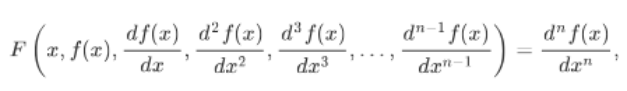

A **general solution** to a differential equation is a that satisfies the differential equation. Although there are usually many solutions to a differential equation, they are still hard to find. For an ODE of order *n*, a **particular solution** is a *p(x)* that satisfies the differential equation and *n* explicitly known values of the solution.

A common set of known values for an ODE solution is the **initial value**. For an ODE of order *n*, the initial value is a known value for the 0th to (*n*-1)th derivatives at *x*=0, *f(0)*, *f(1)(0)*,...*f(n-1)(0)*.

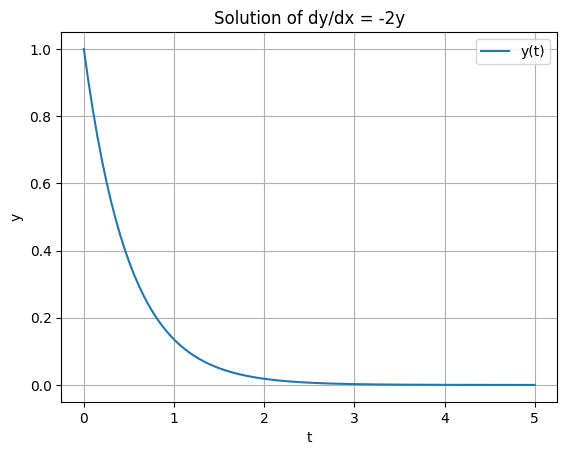

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# define ODE function
def dydx(t, y):
    return -2 * y

# initial conditions
t0, y0 = 0, 1
# time span to solve over
t_span = (t0, 5)
# time evaluation points
t_eval = np.linspace(t0, 5, 100)


solution = solve_ivp(dydx, t_span, [y0], t_eval=t_eval)

plt.plot(solution.t, solution.y[0], label="y(t)")
plt.xlabel("t")
plt.ylabel("y")
plt.title("Solution of dy/dx = -2y")
plt.legend()
plt.grid()
plt.show()


# **Reduction of Order**

Many numerical methods for solving initial value problems are designed specically to solve first-order differential equations. To make these solvers useful for solving higher order differential equations, we must often **reduce the order** of the differential equation to first order. Thus, **Reduction of Order** is a mathematical technique used to find a second, linearly independent solution to a second-order linear differential equation when one solution is already known.


The ODEs of interest in this course can be expressed as:
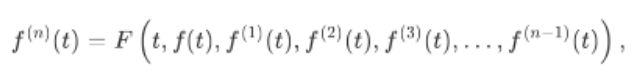




It transforms a second-order equation into a first-order equation in terms of *v'*, making it easier to solve. The final second solution is linearly independent of the first, helping construct the general solution.



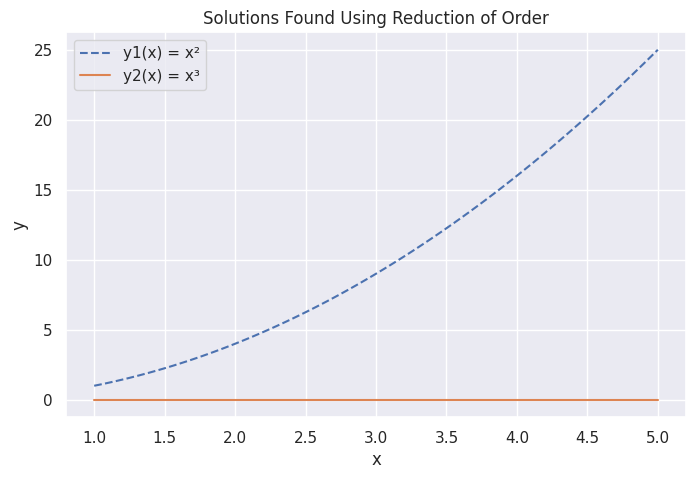

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import solve_ivp

# define first solution
def y1(x):
    return x**2

# define the first-order ODE for v' obtained using reduction of order:
def reduction_of_order(t, v):
    return [0]

# solve for v(x), assuming v(1) = 0, v'(1) = 1
x_span = (1, 5)
v_init = [0]
sol = solve_ivp(reduction_of_order, x_span, v_init, t_eval=np.linspace(1, 5, 100))

# second solution
x_values = sol.t
v_values = sol.y[0]
y2_values = v_values * y1(x_values)
sns.set(style="darkgrid")

plt.figure(figsize=(8, 5))
sns.lineplot(x=x_values, y=y1(x_values), label="y1(x) = x²", linestyle="dashed")
sns.lineplot(x=x_values, y=y2_values, label="y2(x) = x³", linestyle="solid")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Solutions Found Using Reduction of Order")
plt.legend()
plt.show()



# **Euler Method**

The **Euler Method** is a numerical technique for solving first-order Ordinary Differential Equations (ODEs) with a given initial condition. It approximates the solution by taking small steps along the direction of the derivative.

The Explicit Euler Formula is the simplest and most intuitive method for solving initial value problems. It can be written as:

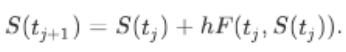

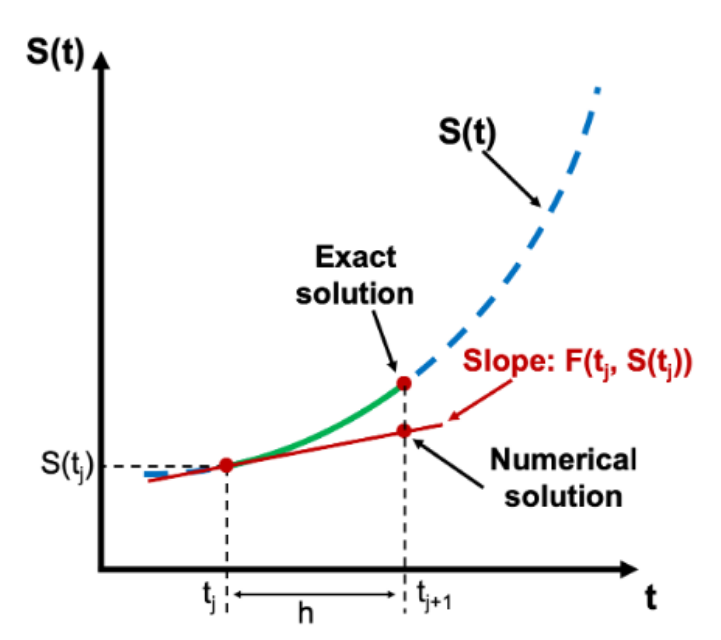

The Euler Method is an explicit first-order method, meaning it approximates the solution using the first derivative and a small step forward. When using a method with this structure, we say that the method integrates the solution of the ODE.

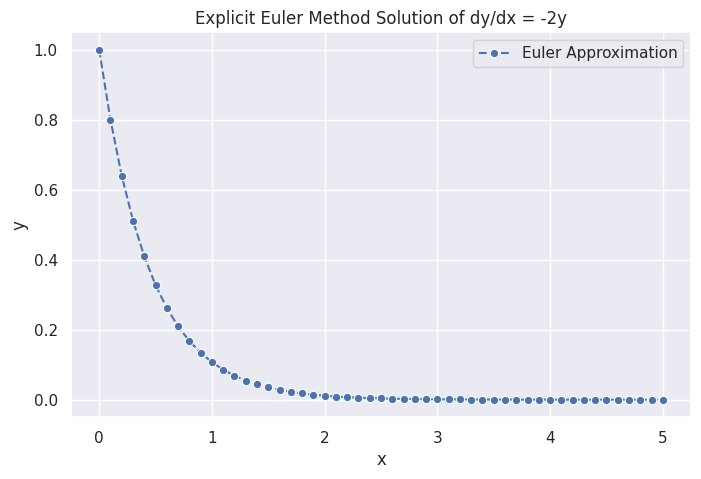

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import solve_ivp


def dydx(t, y):
    return -2 * y

# explicit euler method
def euler_method(f, x0, y0, h, x_end):
    x_values = np.arange(x0, x_end + h, h)
    y_values = np.zeros(len(x_values))
    y_values[0] = y0

    for i in range(1, len(x_values)):
        y_values[i] = y_values[i-1] + h * f(x_values[i-1], y_values[i-1])

    return x_values, y_values

# parameters for euler method
h = 0.1
x_euler, y_euler = euler_method(dydx, 0, 1, h, 5)


sns.set(style="darkgrid")


plt.figure(figsize=(8, 5))
sns.lineplot(x=x_euler, y=y_euler, marker='o', linestyle='dashed', label="Euler Approximation")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Explicit Euler Method Solution of dy/dx = -2y")
plt.legend()
plt.show()
